# Exploratory Data Analysis

---

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy
import os

In [2]:
DATASET_FOLDER = "QQP"
VECTORS_FOLDER = "vectors"

## Load Raw Datasets

In [3]:
train_df = pd.read_csv(os.path.join(DATASET_FOLDER, "train.tsv"), sep="\t")
test_df = pd.read_csv(os.path.join(DATASET_FOLDER, "test.tsv"), sep="\t")
dev_df = pd.read_csv(os.path.join(DATASET_FOLDER, "dev.tsv"), sep="\t")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363846 entries, 0 to 363845
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            363846 non-null  int64 
 1   qid1          363846 non-null  int64 
 2   qid2          363846 non-null  int64 
 3   question1     363846 non-null  object
 4   question2     363846 non-null  object
 5   is_duplicate  363846 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.7+ MB


In [5]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40430 entries, 0 to 40429
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40430 non-null  int64 
 1   qid1          40430 non-null  int64 
 2   qid2          40430 non-null  int64 
 3   question1     40430 non-null  object
 4   question2     40430 non-null  object
 5   is_duplicate  40430 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390965 entries, 0 to 390964
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         390965 non-null  int64 
 1   question1  390965 non-null  object
 2   question2  390965 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.9+ MB


## Check Target Distribution

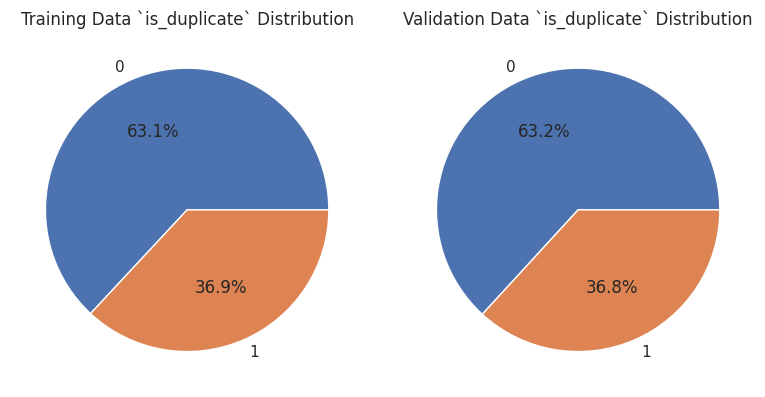

In [7]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
labels, counts = zip(
    *train_df["is_duplicate"].value_counts().reset_index().values.tolist()
)
_ = ax[0].pie(counts, labels=labels, autopct="%1.1f%%")
_ = ax[0].set_title("Training Data `is_duplicate` Distribution")

labels, counts = zip(
    *dev_df["is_duplicate"].value_counts().reset_index().values.tolist()
)
_ = ax[1].pie(counts, labels=labels, autopct="%1.1f%%")
_ = ax[1].set_title("Validation Data `is_duplicate` Distribution")
fig.tight_layout()

## Identify Duplicates

In [8]:
train_df["question1"] = train_df["question1"].str.lower()
train_df["question2"] = train_df["question2"].str.lower()
test_df["question1"] = test_df["question1"].str.lower()
test_df["question2"] = test_df["question2"].str.lower()
dev_df["question1"] = dev_df["question1"].str.lower()
dev_df["question2"] = dev_df["question2"].str.lower()

### Level 1 Duplicates

In [9]:
train_df[train_df.duplicated(subset=["qid1", "qid2"])]

,id,qid1,qid2,question1,question2,is_duplicate


In [10]:
train_df[
    train_df.duplicated(subset=["question1", "question2", "is_duplicate"], keep=False)
].sort_values("question1")

,id,qid1,qid2,question1,question2,is_duplicate
55995,358329,119835,487794,"apart from internet, does redmi note 3 support...",does redmi note 3 support volte?,1
46442,69446,119835,119836,"apart from internet, does redmi note 3 support...",does redmi note 3 support volte?,1
13130,134339,214739,170513,can you give me feedback on my youtube channel?,can you please give me feedback on my youtube ...,1
18531,103118,170512,170513,can you give me feedback on my youtube channel?,can you please give me feedback on my youtube ...,1
116604,288584,10329,3595,can you offer me any advice on how to lose wei...,how do i lose weight?,1
...,...,...,...,...,...,...
176223,374261,209654,82869,will the world end?,how and when is the world going to end?,1
254950,305429,209654,72545,will the world end?,when will be the end of the world and why?,1
331939,77049,103384,82869,will the world end?,how and when is the world going to end?,1
301131,172193,36296,15596,will win the 2016 presidential race?,who do you think will win the 2016 presidentia...,1


In [11]:
train_df = train_df.drop_duplicates(subset=["question1", "question2", "is_duplicate"])

In [12]:
train_df[
    train_df.duplicated(subset=["question1", "question2"], keep=False)
]

,id,qid1,qid2,question1,question2,is_duplicate
262,212168,317182,317183,what is 0 divided by infinity?,what is 0 divided by 0?,1
55141,103248,61100,5619,why do people believe in god?,why do people believe in god when the level of...,1
119347,2832,5618,5619,why do people believe in god?,why do people believe in god when the level of...,0
226257,308902,317182,432813,what is 0 divided by infinity?,what is 0 divided by 0?,0
253391,5783,11359,11360,how can i score good marks in gre?,how do i prepare for gre?,0
275365,164717,11359,19809,how can i score good marks in gre?,how do i prepare for gre?,1


In [13]:
train_df = train_df.drop(index=[275365, 55141, 262])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363557 entries, 0 to 363845
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            363557 non-null  int64 
 1   qid1          363557 non-null  int64 
 2   qid2          363557 non-null  int64 
 3   question1     363557 non-null  object
 4   question2     363557 non-null  object
 5   is_duplicate  363557 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 19.4+ MB


In [14]:
dev_df[dev_df.duplicated(subset=["qid1", "qid2"])]

,id,qid1,qid2,question1,question2,is_duplicate


In [15]:
dev_df[
    dev_df.duplicated(subset=["question1", "question2", "is_duplicate"], keep=False)
].sort_values("question1")

,id,qid1,qid2,question1,question2,is_duplicate
3230,149363,14696,10330,how can i lose 25 kg?,how do i lose weight?,1
34844,243949,14696,3595,how can i lose 25 kg?,how do i lose weight?,1
5767,99109,501,60896,how can you recover your gmail password?,how do i recover my gmail account when the rec...,1
27298,33122,33900,60896,how can you recover your gmail password?,how do i recover my gmail account when the rec...,1
11526,46802,18655,29701,how do i post a question in quora?,how do i get a question posted?,1
18850,15550,29700,29701,how do i post a question in quora?,how do i get a question posted?,1
1241,140703,130137,15767,what is your new years resolution?,what is your new year resolution?,1
26683,220785,130137,14767,what is your new years resolution?,what is your new year resolution?,1
4710,238128,120606,30689,what would life be like without the internet?,what would the world look like without internet?,1
17116,16087,30688,30689,what would life be like without the internet?,what would the world look like without internet?,1


In [16]:
dev_df = dev_df.drop_duplicates(subset=["question1", "question2", "is_duplicate"])

In [17]:
dev_df[
    dev_df.duplicated(subset=["question1", "question2"], keep=False)
]

,id,qid1,qid2,question1,question2,is_duplicate


In [18]:
dev_df = dev_df.drop_duplicates(subset=["question1", "question2"])
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40425 entries, 0 to 40429
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40425 non-null  int64 
 1   qid1          40425 non-null  int64 
 2   qid2          40425 non-null  int64 
 3   question1     40425 non-null  object
 4   question2     40425 non-null  object
 5   is_duplicate  40425 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.2+ MB


In [19]:
test_df[test_df.duplicated(subset=["question1", "question2"], keep=False)].sort_values("question1")

,id,question1,question2
27521,27521,"""only two tatkal tickets can be booked from th...",irctc tatkal says we can book only 2 tatkal ti...
182542,182542,"""only two tatkal tickets can be booked from th...",irctc tatkal says we can book only 2 tatkal ti...
186320,186320,". as a student, how can you be a healer?","as a student, how can you be a healer?"
87445,87445,". as a student, how can you be a healer?","as a student, how can you be a healer?"
309214,309214,1 horsepower equals to how much cc?,"on average, how much horsepower does a superch..."
...,...,...,...
253742,253742,would de broglie have agreed with the notion t...,could 'empty' space be a sea of massive photon...
255154,255154,would einstein and de broglie have realized a ...,could 'empty' space be a sea of massive photon...
80921,80921,would einstein and de broglie have realized a ...,could 'empty' space be a sea of massive photon...
177476,177476,would legalizing prostitution end human traffi...,will the decriminalization of prostitution red...


### Level 2 Duplicates

In [20]:
train_df["uuid"] = train_df[["qid1", "qid2"]].apply(lambda x: tuple(sorted(x)), axis=1)
train_df[train_df["uuid"].duplicated()]

,id,qid1,qid2,question1,question2,is_duplicate,uuid


In [21]:
train_df["uuid"] = train_df[["question1", "question2"]].apply(lambda x: tuple(sorted(x)), axis=1)
train_df[train_df.duplicated(subset=["uuid", "is_duplicate"], keep=False)]

,id,qid1,qid2,question1,question2,is_duplicate,uuid
715,190358,21693,30022,how could i improve my english?,how can i improve my communication skills in e...,1,(how can i improve my communication skills in ...
1634,365035,7002,17398,daniel ek: when is spotify coming to india?,daniel ek: when will spotify be available for ...,1,"(daniel ek: when is spotify coming to india?, ..."
1946,218853,240856,325591,what is an implicit function?,what is implicit function?,1,"(what is an implicit function?, what is implic..."
3143,129848,104629,43097,what is your new year resolution?,what will be your new year resolution for 2017...,1,"(what is your new year resolution?, what will ..."
3591,127534,33176,15767,what are your new year resolutions for 2017?,what is your new year resolution?,1,"(what are your new year resolutions for 2017?,..."
...,...,...,...,...,...,...,...
356265,203174,7002,82307,daniel ek: when is spotify coming to india?,daniel ek: why isn't spotify available in indi...,1,"(daniel ek: when is spotify coming to india?, ..."
357548,374109,45521,1032,what is biggest difference between chinese and...,what are the major differences between chinese...,1,(what are the major differences between chines...
358024,140844,9662,14767,what is your new year resolutions in 2017?,what is your new year resolution?,1,"(what is your new year resolution?, what is yo..."
358523,294381,2675,5664,what do you think of the decision by the india...,what do you think of prime minister narendra m...,1,(what do you think of prime minister narendra ...


In [22]:
train_df = train_df.drop_duplicates(subset=["uuid", "is_duplicate"])

In [23]:
train_df["uuid"] = train_df[["question1", "question2"]].apply(lambda x: tuple(sorted(x)), axis=1)
train_df[train_df.duplicated(subset=["uuid"], keep=False)]

,id,qid1,qid2,question1,question2,is_duplicate,uuid
82068,191200,42678,49010,do ghosts really exist?,do ghosts really exists?,1,"(do ghosts really exist?, do ghosts really exi..."
102704,149553,235545,208492,what are the best instagram bots?,what are the best instagram like-bots?,0,"(what are the best instagram bots?, what are t..."
127152,129843,208492,208493,what are the best instagram like-bots?,what are the best instagram bots?,1,"(what are the best instagram bots?, what are t..."
134374,231796,341680,288320,how does gravity exist?,why does gravity exist? how does gravity attra...,0,"(how does gravity exist?, why does gravity exi..."
233682,386464,288320,249187,why does gravity exist? how does gravity attra...,how does gravity exist?,1,"(how does gravity exist?, why does gravity exi..."
241390,373268,186486,156872,how do i download youtube videos?,what is the best way to download a youtube video?,1,"(how do i download youtube videos?, what is th..."
321966,378923,156872,510388,what is the best way to download a youtube video?,how do i download youtube videos?,0,"(how do i download youtube videos?, what is th..."
329368,110620,181339,42678,do ghosts really exists?,do ghosts really exist?,0,"(do ghosts really exist?, do ghosts really exi..."


In [24]:
train_df = train_df.drop(index=[329368, 321966, 134374, 102704])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363429 entries, 0 to 363845
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            363429 non-null  int64 
 1   qid1          363429 non-null  int64 
 2   qid2          363429 non-null  int64 
 3   question1     363429 non-null  object
 4   question2     363429 non-null  object
 5   is_duplicate  363429 non-null  int64 
 6   uuid          363429 non-null  object
dtypes: int64(4), object(3)
memory usage: 22.2+ MB


In [ ]:
dev_df["uuid"] = dev_df[["qid1", "qid2"]].apply(lambda x: tuple(sorted(x)), axis=1)
dev_df[dev_df[["uuid"]].duplicated()]

In [ ]:
dev_df["uuid"] = dev_df[["question1", "question2"]].apply(lambda x: tuple(sorted(x)), axis=1)
dev_df[dev_df["uuid"].duplicated()]

In [ ]:
test_df["uuid"] = test_df[["question1", "question2"]].apply(lambda x: tuple(sorted(x)), axis=1)
test_df[test_df["uuid"].duplicated(keep=False)].sort_values("uuid")

In [19]:
train_df = train_df.drop(columns=["uuid"])
test_df = test_df.drop(columns=["uuid"])
dev_df = dev_df.drop(columns=["uuid"])

### Level 3 Duplicates

In [20]:
def cleanup_duplicate_text(df: pd.DataFrame):
    q_pairs = df.loc[:, ["id", "qid1", "qid2", "is_duplicate"]]
    qs = (
        pd.concat(
            [
                df[["qid1", "question1"]].rename(
                    columns={"qid1": "qid", "question1": "question"}
                ),
                df[["qid2", "question2"]].rename(
                    columns={"qid2": "qid", "question2": "question"}
                ),
            ],
            axis=0,
        )
        .drop_duplicates()
        .dropna()
        .sort_values("qid", axis=0)
    )
    qs_dedup = qs.drop_duplicates(subset="question", keep="first")
    qid_map = pd.Series(qs_dedup["qid"].values, index=qs_dedup["question"]).to_dict()
    reverse_map = qs.set_index("qid")["question"].map(qid_map)
    final_qid_map = pd.Series(reverse_map, index=qs["qid"]).to_dict()
    qs = qs_dedup
    q_pairs["qid1"] = q_pairs["qid1"].map(final_qid_map)
    q_pairs["qid2"] = q_pairs["qid2"].map(final_qid_map)
    return (
        q_pairs.merge(qs, how="left", left_on="qid1", right_on="qid")
        .rename(columns={"question": "question1"})
        .merge(qs, how="left", left_on="qid2", right_on="qid")
        .rename(columns={"question": "question2"})
        .drop(columns=["qid_x", "qid_y"])
    )

In [ ]:
train_df = cleanup_duplicate_text(train_df)
train_df["uuid"] = train_df[["qid1", "qid2"]].apply(lambda x: tuple(sorted(x)), axis=1)
mask = train_df["uuid"].duplicated()
train_df = train_df[["id", "qid1", "qid2", "question1", "question2", "is_duplicate"]]
train_df[mask]

In [ ]:
dev_df = cleanup_duplicate_text(dev_df)
dev_df["uuid"] = dev_df[["qid1", "qid2"]].apply(lambda x: tuple(sorted(x)), axis=1)
mask = dev_df["uuid"].duplicated()
dev_df = dev_df[["id", "qid1", "qid2", "question1", "question2", "is_duplicate"]]
dev_df[mask]